In [13]:
import torch

t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]

t_u = torch.tensor(t_u) #input
t_c = torch.tensor(t_c) #ground truth

def model(t_u, w, b):
    return w * t_u + b

t_p = model(t_u, 1.0, 0.0)

#mean square loss
def loss_fn(t_p, t_c):
    return ((t_p - t_c)**2).mean()

delta = 0.1
learning_rate = 0.01
w = 1.0
b = 0.0

# delta L / delta w
loss_rate_change_wrt_w = (loss_fn(model(t_u, w+delta, b), t_c) -loss_fn(model(t_u, w-delta, b), t_c)) / 2.0 * delta
# delta L / delta b
loss_rate_change_wrt_b = (loss_fn(model(t_u, w, b + delta), t_c) - loss_fn(model(t_u, w, b-delta), t_c)) / 2.0 * delta

w = w - learning_rate * loss_rate_change_wrt_w
b = b - learning_rate * loss_rate_change_wrt_b

w,b

(tensor(0.5483), tensor(-0.0083))

In [18]:
# d_l/d_m
def d_loss_wrt_model(t_p, t_c):
    return 2.0 * (t_p - t_c) / t_p.size(0)

# d_m/d_w
def d_model_wrt_w(t_u, w, b):
    return t_u

# d_m/ d_b
def d_model_wrt_b(t_u, w, b):
    return 1.0

# gradient of loss wrt params
def gradient_fn(t_u, t_c, t_p, w, b):
    d_loss_wrt_w = d_loss_wrt_model(t_p, t_c) * d_model_wrt_w(t_u, w, b)
    d_loss_wrt_b = d_loss_wrt_model(t_p, t_c) * d_model_wrt_b(t_u, w, b)
    return torch.stack([d_loss_wrt_w.sum(), d_loss_wrt_b.sum()])

gradient_fn(t_u, t_c, t_p, w, b)

tensor([4517.2964,   82.6000])

In [33]:
def training_loop(n_epochs,learning_rate, params, t_c, t_u):
    for epoch in range(1, n_epochs + 1):
        w,b = params
        t_p = model(t_u, w, b)
        grad = gradient_fn(t_u, t_c, t_p, w, b)
        params = params - learning_rate * grad #gradient descent
        if epoch % 1000 == 0:
            print('epoch %d, loss %f' %(epoch, loss_fn(t_p, t_c)))
    return params

In [28]:
training_loop(n_epochs = 100,
              learning_rate = 0.0001,
              params = torch.tensor([1.0, 0.0]),
              t_c = t_c,
              t_u = t_u)

epoch 1, loss 1763.884766, gradient 4517.296387 82.599998
epoch 2, loss 323.090515, gradient 1859.549316 35.784290
epoch 3, loss 78.929634, gradient 765.466553 16.512201
epoch 4, loss 37.552845, gradient 315.078979 8.578665
epoch 5, loss 30.540283, gradient 129.673279 5.312729
epoch 6, loss 29.351154, gradient 53.349541 3.968249
epoch 7, loss 29.148884, gradient 21.930353 3.414754
epoch 8, loss 29.113848, gradient 8.996441 3.186873
epoch 9, loss 29.107145, gradient 3.672112 3.093032
epoch 10, loss 29.105247, gradient 1.480309 3.054372
epoch 11, loss 29.104168, gradient 0.578056 3.038425
epoch 12, loss 29.103222, gradient 0.206573 3.031829
epoch 13, loss 29.102295, gradient 0.053730 3.029083
epoch 14, loss 29.101379, gradient -0.009312 3.027920
epoch 15, loss 29.100466, gradient -0.035259 3.027410
epoch 16, loss 29.099548, gradient -0.045883 3.027170
epoch 17, loss 29.098631, gradient -0.050220 3.027040
epoch 18, loss 29.097717, gradient -0.051991 3.026956
epoch 19, loss 29.096796, grad

tensor([ 0.2327, -0.0438])

In [36]:
t_un = 0.1 * t_u
params = training_loop(n_epochs = 10000,
              learning_rate = 0.01,
              params = torch.tensor([1.0, 0.0]),
              t_c = t_c,
              t_u = t_un)

epoch 1000, loss 3.828538
epoch 2000, loss 2.957698
epoch 3000, loss 2.928648
epoch 4000, loss 2.927680
epoch 5000, loss 2.927648
epoch 6000, loss 2.927647
epoch 7000, loss 2.927645
epoch 8000, loss 2.927645
epoch 9000, loss 2.927645
epoch 10000, loss 2.927645


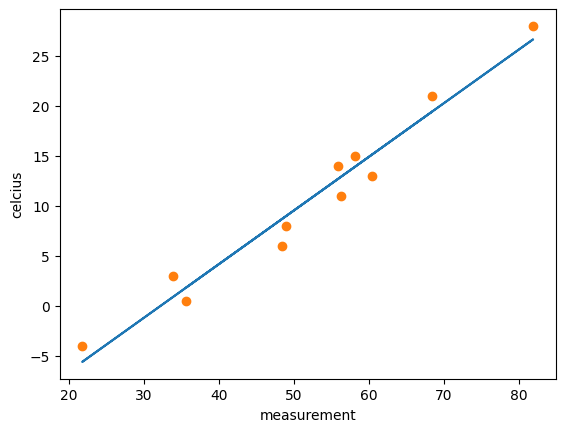

In [55]:
from matplotlib import pyplot as plt

t_p = model(t_un, *params)
plt.figure(dpi = 100)
plt.xlabel("measurement")
plt.ylabel("celcius")
plt.plot(t_u.numpy(), t_p.numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

In [71]:
params = torch.tensor([1.0, 0.0], requires_grad=True)

loss = loss_fn(model(t_un, *params), t_c)
if params.grad is not None:
    params.grad.zero_()
loss.backward() #forcing back propagation
params.grad
loss = loss_fn(model(t_un, *params), t_c)
if params.grad is not None:
    params.grad.zero_()
loss.backward() #forcing back propagation
params.grad
loss = loss_fn(model(t_un, *params), t_c)
if params.grad is not None:
    params.grad.zero_()
loss.backward() #forcing back propagation
params.grad


tensor([-77.6140, -10.6400])

In [74]:
def training_loop_2(n_epochs, learning_rate, params, t_c, t_u):
    for epoch in range(1, 1 + n_epochs):
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
        if params.grad is not None:
            params.grad.zero_()
        loss.backward() # gradient is computed and stored in params.grad
        with torch.no_grad():
            params -= learning_rate * params.grad #gradient descent
        if epoch % 1000 == 0:
            print('epoch %d, loss %f' %(epoch, loss))
    return params

In [75]:
params = training_loop_2(n_epochs=10000,
                         learning_rate= 0.01,
                         params =  torch.tensor([1.0, 0.0], requires_grad=True),
                         t_c = t_c,
                         t_u = t_un)

epoch 1000, loss 3.828538
epoch 2000, loss 2.957698
epoch 3000, loss 2.928648
epoch 4000, loss 2.927679
epoch 5000, loss 2.927647
epoch 6000, loss 2.927647
epoch 7000, loss 2.927645
epoch 8000, loss 2.927645
epoch 9000, loss 2.927645
epoch 10000, loss 2.927645


In [77]:
params

tensor([  5.3676, -17.3042], requires_grad=True)

In [79]:
import torch.optim as optim

dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'NAdam',
 'Optimizer',
 'RAdam',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional',
 '_multi_tensor',
 'lr_scheduler',
 'swa_utils']

In [81]:
params = torch.tensor([1.0, 0.0], requires_grad = True)
learning_rate = 0.001
optimizer = optim.SGD([params], lr=learning_rate)
t_p = model(t_u, *params)
loss = loss_fn(t_p, t_c)
optimizer.zero_grad()
loss.backward()
optimizer.step()
params

tensor([-3.5173, -0.0826], requires_grad=True)

In [83]:
def training_loop_3(n_epochs, optimizer, params, t_u, t_c):
    for epoch in range(1, 1 + n_epochs):
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if epoch % 1000 == 0:
            print('epoch %d, loss %f' %(epoch, loss))
    return params

In [85]:
params = torch.tensor([1.0, 0.0], requires_grad = True)

training_loop_3(n_epochs=10000,
                optimizer=optim.SGD([params], lr = 0.01),
                params = params,
                t_c = t_c,
                t_u = t_un)

epoch 1000, loss 3.828538
epoch 2000, loss 2.957698
epoch 3000, loss 2.928648
epoch 4000, loss 2.927679
epoch 5000, loss 2.927647
epoch 6000, loss 2.927647
epoch 7000, loss 2.927645
epoch 8000, loss 2.927645
epoch 9000, loss 2.927645
epoch 10000, loss 2.927645


tensor([  5.3676, -17.3042], requires_grad=True)

In [89]:
params = torch.tensor([1.0, 0.0], requires_grad = True)

training_loop_3(n_epochs=10000,
                optimizer=optim.Adam([params], lr = 0.01),
                params = params,
                t_c = t_c,
                t_u = t_un)

epoch 1000, loss 15.752771
epoch 2000, loss 5.767542
epoch 3000, loss 3.196812
epoch 4000, loss 2.933181
epoch 5000, loss 2.927654
epoch 6000, loss 2.927646
epoch 7000, loss 2.927646
epoch 8000, loss 2.927646
epoch 9000, loss 2.927646
epoch 10000, loss 2.927646


tensor([  5.3677, -17.3048], requires_grad=True)

In [100]:
n_samples = t_u.size(0)
n_val = int (0.2 * n_samples)

random_indexes = torch.randperm(n_samples)
train_indexes = random_indexes[:-n_val]
val_indexes = random_indexes[-n_val:]
random_indexes, train_indexes, val_indexes

train_t_c = t_c[train_indexes]
train_t_u = t_u[train_indexes]
val_t_c = t_c[val_indexes]
val_t_u = t_u[val_indexes]

train_t_un = train_t_u * 0.1
val_t_un = val_t_u * 0.1

In [107]:
def training_loop_4(n_epochs, optimizer, params, train_t_c, train_t_u, val_t_c, val_t_u):
    for epoch in range(1, 1 + n_epochs):
        train_t_p = model(train_t_u, *params)
        val_t_p = model(val_t_u, *params)
        
        train_loss = loss_fn(train_t_p, train_t_c)
        val_loss = loss_fn(val_t_p, val_t_c)
        
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        
        if (epoch <= 5 or epoch % 1000 == 0):
            print('epoch %d, training loss %f, validation loss %f' %(epoch, train_loss, val_loss))
        
    return params

In [108]:
params = torch.tensor([1.0, 0.0], requires_grad = True)

params = training_loop_4(n_epochs=10000,
                         optimizer=optim.SGD([params], lr = 0.01),
                         params = params,
                         train_t_c=train_t_c,
                         train_t_u=train_t_un,
                         val_t_c=val_t_c,
                         val_t_u=val_t_un)
params

epoch 1, training loss 74.897476, validation loss 104.965248
epoch 2, training loss 34.046864, validation loss 56.643517
epoch 3, training loss 27.602421, validation loss 47.368874
epoch 4, training loss 26.529606, validation loss 45.181160
epoch 5, training loss 26.295618, validation loss 44.491440
epoch 1000, training loss 3.785444, validation loss 7.284127
epoch 2000, training loss 3.006746, validation loss 3.929180
epoch 3000, training loss 2.980241, validation loss 3.431228
epoch 4000, training loss 2.979341, validation loss 3.343500
epoch 5000, training loss 2.979309, validation loss 3.327466
epoch 6000, training loss 2.979309, validation loss 3.324416
epoch 7000, training loss 2.979307, validation loss 3.324381
epoch 8000, training loss 2.979307, validation loss 3.324381
epoch 9000, training loss 2.979307, validation loss 3.324381
epoch 10000, training loss 2.979307, validation loss 3.324381


tensor([  5.1576, -16.2434], requires_grad=True)